In [7]:
# Import libraries 
import mysql.connector as mysql
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Connect to MySQL
conn=(
    mysql.connect(
        host='localhost',
        user='root',
        password='password',
        database='customer'
    )
)

#Define Query
query="select * from customer_data;"

#Load Data into DataFrame
Data=pd.read_sql(query,conn)

# Change DataType
Data=Data.astype({
    'SeniorCitizen':'int',
    'tenure':'int',
    'MonthlyCharges':'int',
    'TotalCharges':'int',   
})

#Rename columns
Data=Data.rename(columns={
    'gender':'Gender',
    'tenure':'Tenure'
})

# Replace string nan
Data=Data.replace('nan','N/A')

# Replace actual NAN (null) values in numeric columns with 0
Data=Data.fillna(0)

# Remove duplicates
Data=Data.drop_duplicates()

#Calculating churn_count column
Data['churn_count']=np.where(Data['Churn']=='Yes',1,0)
Data.to_excel("customer_churn.xlsx",index=False)

C:\Users\ajitk\AppData\Local\Temp\ipykernel_29556\2754182795.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  Data=pd.read_sql(query,conn)


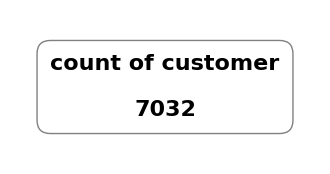

In [2]:
Data
#Calculating total customer
Total_customer=Data['customerID'].nunique()

#Showing customer count in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'count of customer\n\n{Total_customer}',ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))
plt.show()


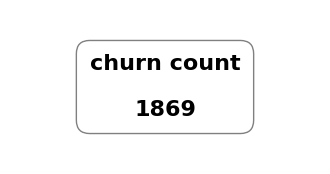

In [3]:
Data
#Calculate total churn count
churn_count=Data['churn_count'].sum()

#Showing churn count in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'churn count\n\n{churn_count}',ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))
plt.show()

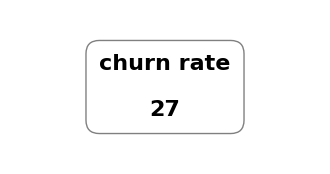

In [4]:
Data
#Calculating the churn rate
churn_rate=round(churn_count/Total_customer*100)

#Showing chrun rate in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'churn rate\n\n{churn_rate}',ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))
plt.show()


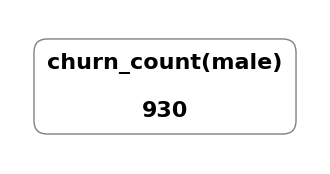

In [5]:
Data
#Calculating churn count as per gender
churn_count_gen=Data.groupby('Gender')['churn_count'].sum()

#Showing male churn count in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'churn_count(male)\n\n{churn_count_gen['Male']}',
        ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))                                        
plt.show()

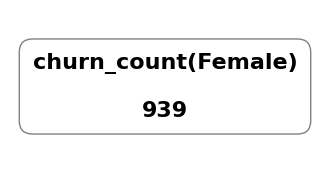

In [6]:
Data
#Showing female churn count in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'churn_count(Female)\n\n{churn_count_gen['Female']}',
        ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))                                        
plt.show()

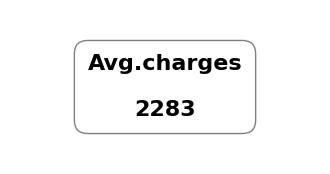

In [244]:
Data
#Calculating avg charges
Avg_charges=round(Data['TotalCharges'].mean())

#Showing avg. charges in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'Avg.charges\n\n{Avg_charges}',
        ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))                                        
plt.show()

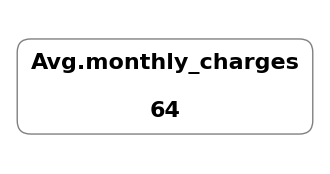

In [245]:
Data
#Calculating avg monthly charges
Avg_charges_monthly = round(Data['MonthlyCharges'].mean())

#Showing avg. monthly charges in card visual
fig,ax=plt.subplots(figsize=(4,2))
ax.axis('off')
ax.text(0.5,0.5,f'Avg.monthly_charges\n\n{Avg_charges_monthly}',
        ha='center',
va='center',
fontsize=16,
fontweight='bold',
bbox=dict(boxstyle='round,pad=0.6',
          facecolor='white',
          edgecolor='grey'
          ))                                        
plt.show()

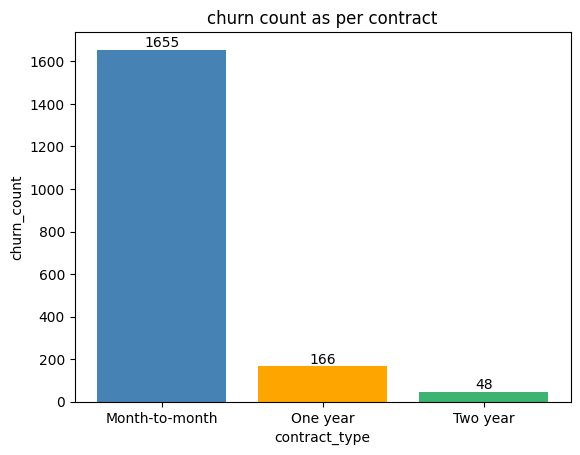

In [246]:
Data
#Calculate churn count as per contract type
churn_as_per_contract=Data.groupby('Contract')['churn_count'].sum()

#Define custom colors for each contract typ
colors=['steelblue','orange','mediumseagreen']
#Create a vertical bar chart using churn counts by contract type
bar=plt.bar(churn_as_per_contract.index,churn_as_per_contract.values,color=colors)

#Add chart title and axis labels
plt.title('churn count as per contract')
plt.xlabel('contract_type')
plt.ylabel('churn_count')

#add data label
plt.bar_label(bar)

plt.show()

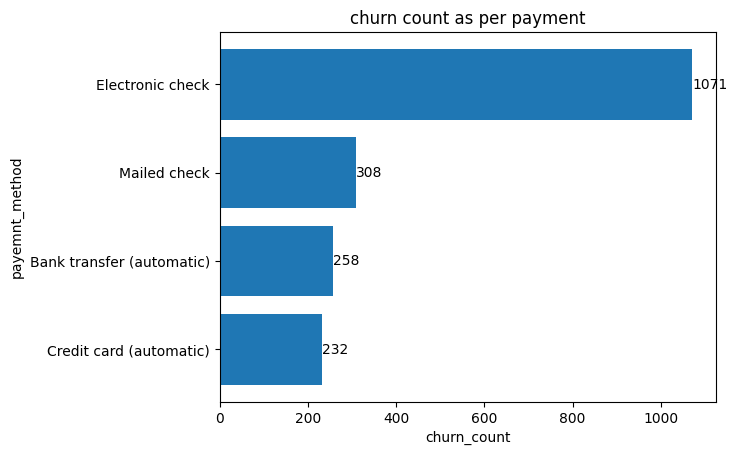

In [247]:
Data
#calculate churn count by payment method
churn_count_payment=Data.groupby('PaymentMethod')['churn_count'].sum()

#Sort values in descending order
Zip=sorted(zip(churn_count_payment.values,churn_count_payment.index),reverse=True)

#Unzip values and labels
sort_y,sort_x=zip(*Zip)

#Reverse the x axis and y axis values
sort_x=sort_x[::-1]
sort_y=sort_y[::-1]

#Create horizontal bar chart
bar=plt.barh(sort_x,sort_y)

#Add chart title and axis labels
plt.title('churn count as per payment')
plt.ylabel('payemnt_method')
plt.xlabel('churn_count')

#add data labels
plt.bar_label(bar)

plt.show()

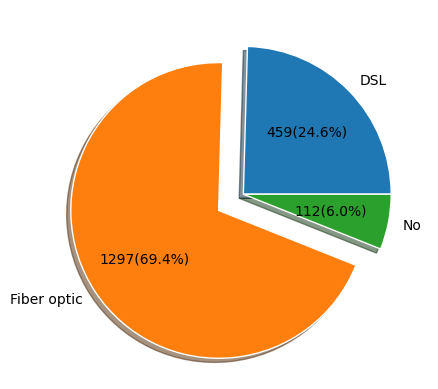

In [263]:
Data
#Calculate count as per internent service
churn_count_internent=Data.groupby('InternetService')['churn_count'].sum()

#define a liist for explode
ex=[0.,0.2,0.0]
#create a function for showing values with percentage
def values(val):
    Total=sum(churn_count_internent.values)
    Total_Values=round(int(val*Total/100))
    return f'{Total_Values}({val:.1f}%)'
    
#create pie chart
plt.pie(churn_count_internent.values,labels=churn_count_internent.index,autopct=values,wedgeprops=dict(edgecolor='white'),shadow=True,explode=ex)
plt.show()